# yahoo finance: https://finance.yahoo.com/quote/BTC-USD/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
# Today's date in YYYY-MM-DD format
today = pd.to_datetime('today').strftime('%Y-%m-%d')

start = "2010-01-01"
end = today

asset = 'BTC-USD'
# df = data.DataReader("AAPL", "yahoo", start, end)
_df = yf.download(asset, start=start, end=end)
# _df.tail()
today

[*********************100%%**********************]  1 of 1 completed


'2024-06-05'

In [3]:
df = _df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
df = df.drop(["Date", "Adj Close"], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100


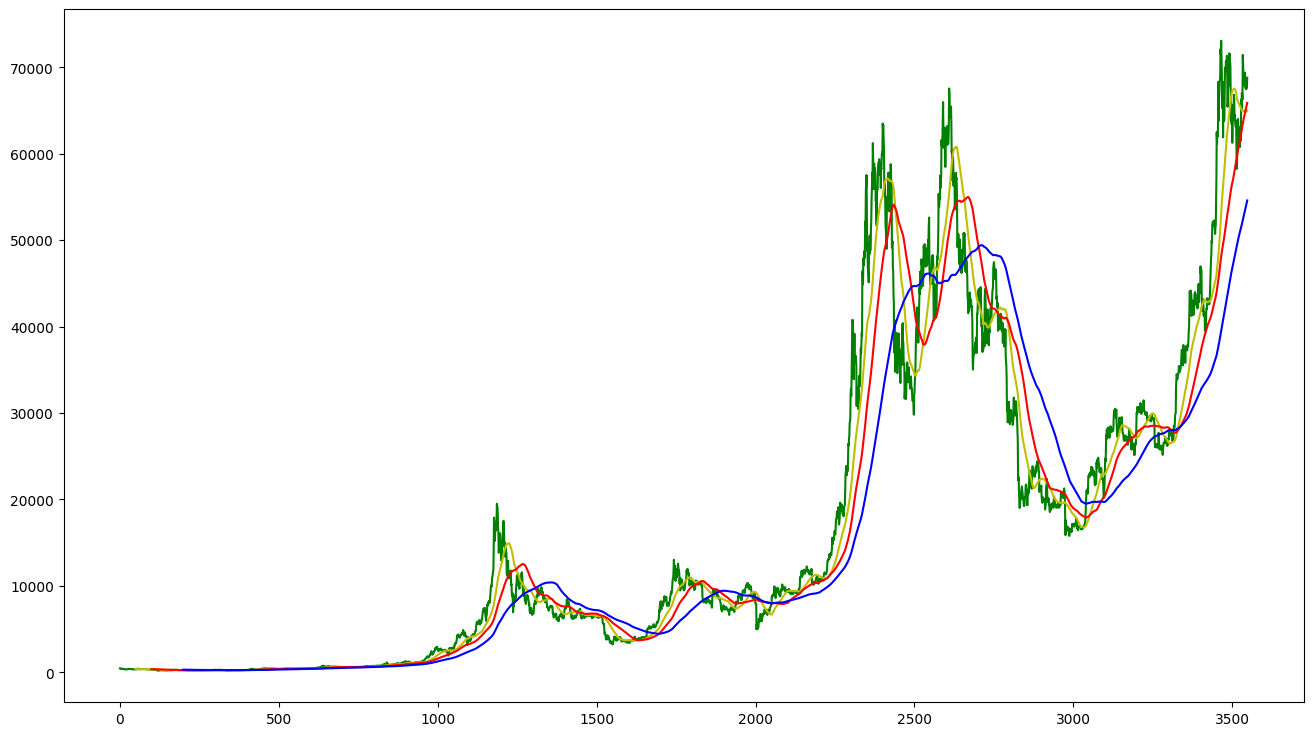

In [5]:
plt.figure(figsize=(16,9))
plt.plot(df.Close, 'g')

ma_50days = df.Close.rolling(50).mean()
ma_100days = df.Close.rolling(100).mean()
ma_200days = df.Close.rolling(200).mean()

plt.plot(ma_50days, 'y')
plt.plot(ma_100days, 'r')
plt.plot(ma_200days, 'b')

In [6]:
ma_100days

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
3543    65235.028437
3544    65391.550781
3545    65555.570430
3546    65725.766953
3547    65898.103750
Name: Close, Length: 3548, dtype: float64

In [7]:
ma_200days

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
3543    53975.814473
3544    54130.759766
3545    54291.606250
3546    54440.961348
3547    54604.211406
Name: Close, Length: 3548, dtype: float64

In [8]:
df.shape

(3548, 5)

In [9]:
training_data = pd.DataFrame(df['Close'][0: int(len(df)*0.75)])
testing_data = pd.DataFrame(df['Close'][int(len(df)*0.75): len(df)])

# data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
# data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

print(training_data.shape)
print(testing_data.shape)

(2661, 1)
(887, 1)


In [10]:
training_data

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014
...,...
2656,50429.859375
2657,50809.515625
2658,50640.417969
2659,47588.855469


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
data_train_array = scaler.fit_transform(training_data)
data_train_array

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.7488243 ],
       [0.70354132],
       [0.68656304]])

In [13]:
data_train_array.shape

(2661, 1)

In [14]:
data_train_array[0]

array([0.00414359])

In [15]:
x_train = []
y_train = []

# data_train_array.shape = (1886, 1)
# Therefore, data_train_array.shape[0] = 1886

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100 : i])
      # => x_train[0] = 100 data points of data_train_array starting from 1st
      # => x_train[1] = 100 data points of data_train_array starting from 2nd
    y_train.append(data_train_array[i, 0])
      # => y_train[0] = 100th data point



In [16]:
x_train[0]

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       [0.00342492],
       [0.0032753 ],
       [0.00332473],
       [0.0038239 ],
       [0.00363714],
       [0.00346454],
       [0.00335845],
       [0.00328567],
       [0.00295417],
       [0.00292874],
       [0.00309905],
       [0.00304965],
       [0.00292288],
       [0.00269198],
       [0.00223721],
       [0.00211322],
       [0.00225521],
       [0.00234585],
       [0.00259445],
       [0.0027738 ],
       [0.0027224 ],
       [0.00273334],
       [0.00297447],
       [0.00315054],
       [0.0033057 ],
       [0.00321523],
       [0.00303393],
       [0.00305177],
       [0.0031658 ],
       [0.00313766],
       [0.00303822],
       [0.00309209],
       [0.00304287],
       [0.00267573],
       [0.00267466],
       [0.00251033],
       [0.00262063],
       [0.00259518],
       [0.00266387],
       [0.00233701],
       [0.00248116],
       [0.00237752],
       [0.00219096],
       [0.00219308],
       [0.002

In [17]:
y_train[0:5]

[0.0022232356246439777,
 0.00204425902854824,
 0.002064677979603642,
 0.001996877316578034,
 0.0019681927864531653]

In [18]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train

array([[[0.00414359],
        [0.00365546],
        [0.00321557],
        ...,
        [0.00232189],
        [0.00214325],
        [0.00209093]],

       [[0.00365546],
        [0.00321557],
        [0.00342492],
        ...,
        [0.00214325],
        [0.00209093],
        [0.00222324]],

       [[0.00321557],
        [0.00342492],
        [0.0032753 ],
        ...,
        [0.00209093],
        [0.00222324],
        [0.00204426]],

       ...,

       [[0.71377312],
        [0.69866459],
        [0.63312813],
        ...,
        [0.75152175],
        [0.74569976],
        [0.75133359]],

       [[0.69866459],
        [0.63312813],
        [0.60122183],
        ...,
        [0.74569976],
        [0.75133359],
        [0.7488243 ]],

       [[0.63312813],
        [0.60122183],
        [0.6439713 ],
        ...,
        [0.75133359],
        [0.7488243 ],
        [0.70354132]]])

In [20]:
y_train

array([0.00222324, 0.00204426, 0.00206468, ..., 0.7488243 , 0.70354132,
       0.68656304])

In [21]:
x_train.shape

(2561, 100, 1)

# Model

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(
    x_train,
    y_train,
    epochs= 50
    )

Epoch 1/50
81/81 [==============================] - 46s 375ms/step - loss: 0.0174
Epoch 2/50
81/81 [==============================] - 26s 321ms/step - loss: 0.0047
Epoch 3/50
81/81 [==============================] - 24s 295ms/step - loss: 0.0038
Epoch 4/50
81/81 [==============================] - 26s 318ms/step - loss: 0.0035
Epoch 5/50
81/81 [==============================] - 27s 335ms/step - loss: 0.0038
Epoch 6/50
81/81 [==============================] - 26s 316ms/step - loss: 0.0038
Epoch 7/50
81/81 [==============================] - 26s 318ms/step - loss: 0.0037
Epoch 8/50
81/81 [==============================] - 27s 336ms/step - loss: 0.0039
Epoch 9/50
81/81 [==============================] - 24s 289ms/step - loss: 0.0037
Epoch 10/50
81/81 [==============================] - 25s 312ms/step - loss: 0.0031
Epoch 11/50
81/81 [==============================] - 26s 315ms/step - loss: 0.0028
Epoch 12/50
81/81 [==============================] - 25s 313ms/step - loss: 0.0037
Epoch 13/50
8

In [26]:
model.save("Keras_Model_Market_Prediction.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
testing_data.head()

,Close
2661,47178.125000
2662,46306.445312
2663,47686.812500
2664,47345.218750
2665,46458.117188


In [28]:
training_data.tail(10)

,Close
2651,46880.277344
2652,48936.613281
2653,48628.511719
2654,50784.539062
2655,50822.195312
2656,50429.859375
2657,50809.515625
2658,50640.417969
2659,47588.855469
2660,46444.710938


In [29]:
early_100days = training_data.tail(100)
testing_data_new = pd.concat([early_100days, testing_data], ignore_index=True)

In [30]:
testing_data_new.head()

,Close
0,40693.675781
1,43574.507812
2,44895.097656
3,42839.750000
4,42716.593750


In [31]:
test_input_data = scaler.fit_transform(testing_data_new)
test_input_data

array([[0.43469523],
       [0.48497485],
       [0.50802331],
       [0.472151  ],
       [0.47000154],
       [0.47858754],
       [0.46160895],
       [0.44064444],
       [0.44989148],
       [0.48875148],
       [0.56425467],
       [0.55717823],
       [0.56570348],
       [0.58163733],
       [0.62355825],
       [0.69069422],
       [0.66354644],
       [0.66637147],
       [0.68383117],
       [0.6803991 ],
       [0.72775321],
       [0.70255555],
       [0.72629253],
       [0.72490371],
       [0.79947104],
       [0.78722294],
       [0.79876711],
       [0.80701305],
       [0.84603682],
       [0.87624551],
       [0.81022607],
       [0.78373381],
       [0.79597461],
       [0.78789761],
       [0.82470612],
       [0.77800092],
       [0.74516444],
       [0.78250984],
       [0.81053661],
       [0.80461767],
       [0.79467155],
       [0.78918165],
       [0.8279625 ],
       [0.82348829],
       [0.7969976 ],
       [0.79129819],
       [0.79831095],
       [0.829

In [32]:
test_input_data.shape

(987, 1)

In [33]:
x_test = []
y_test = []

for i in range(100, test_input_data.shape[0]):
    x_test.append(test_input_data[i-100 : i])
    y_test.append(test_input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(887, 100, 1)
(887,)


# Prdiction

In [35]:
y_predicted = model.predict(x_test)
y_predicted.shape

28/28 [==============================] - 5s 144ms/step


(887, 1)

In [36]:
y_test

array([0.54786936, 0.53265579, 0.55674756, 0.55078567, 0.53530294,
       0.5255197 , 0.48487879, 0.4777566 , 0.44977871, 0.45285115,
       0.45595188, 0.45437517, 0.47033772, 0.49151269, 0.46781948,
       0.47668794, 0.47804404, 0.47693542, 0.46186762, 0.46405069,
       0.45303243, 0.43446384, 0.36075737, 0.33585055, 0.35760687,
       0.36419585, 0.36942614, 0.36764796, 0.37264154, 0.38391799,
       0.39009375, 0.38624396, 0.39611413, 0.40065454, 0.36940834,
       0.3729272 , 0.4487834 , 0.44774126, 0.46469298, 0.4896135 ,
       0.49446828, 0.49831411, 0.48481089, 0.46461451, 0.46176147,
       0.46094198, 0.46773829, 0.50244014, 0.49173536, 0.4319784 ,
       0.42312903, 0.42472041, 0.395211  , 0.37154281, 0.39267416,
       0.375405  , 0.39348716, 0.40887403, 0.40697041, 0.38261691,
       0.47832042, 0.49859056, 0.49107664, 0.46537986, 0.40753688,
       0.41212672, 0.39501213, 0.38876485, 0.40054976, 0.45719671,
       0.41277031, 0.40155686, 0.40345994, 0.38505824, 0.41677

In [37]:
y_predicted

array([[0.6197094 ],
       [0.6086362 ],
       [0.5934231 ],
       [0.57809365],
       [0.5652188 ],
       [0.55534816],
       [0.5479214 ],
       [0.5402778 ],
       [0.5309869 ],
       [0.5188747 ],
       [0.5046619 ],
       [0.49004233],
       [0.47667128],
       [0.4665534 ],
       [0.46175033],
       [0.46153682],
       [0.46476203],
       [0.4700169 ],
       [0.47586322],
       [0.48042214],
       [0.482831  ],
       [0.48251688],
       [0.478871  ],
       [0.46948773],
       [0.45436037],
       [0.43514156],
       [0.41410822],
       [0.39373899],
       [0.37603796],
       [0.3625403 ],
       [0.35451892],
       [0.35244933],
       [0.35548034],
       [0.36219493],
       [0.37114477],
       [0.37947494],
       [0.38542932],
       [0.39165938],
       [0.40013403],
       [0.41203022],
       [0.42793393],
       [0.4467947 ],
       [0.46648598],
       [0.4837609 ],
       [0.49539375],
       [0.50031143],
       [0.49922794],
       [0.494

In [38]:
scaled_scale = scaler.scale_

In [39]:
scale_factor = 1/scaled_scale
y_predicted_price = y_predicted * scale_factor
y_test_price = y_test * scale_factor

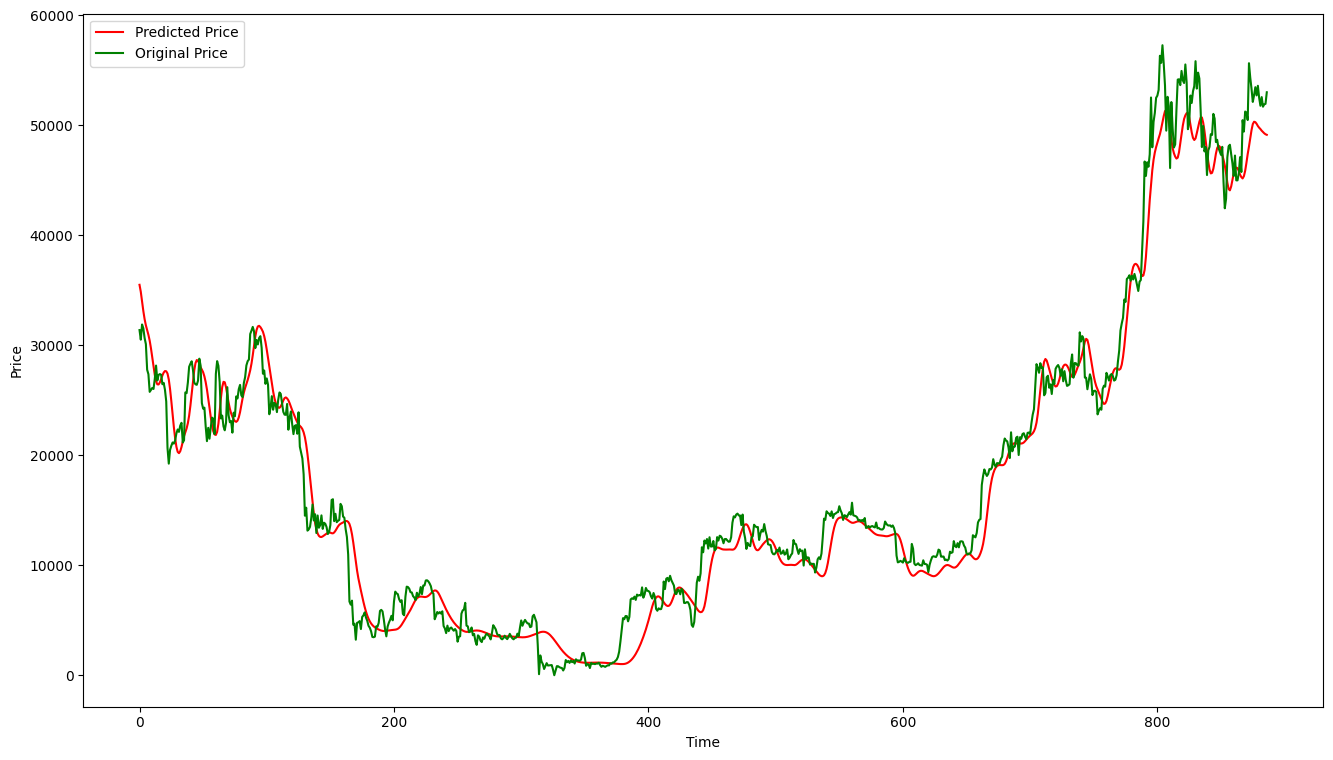

In [40]:
plt.figure(figsize=(16,9))
plt.plot(y_predicted_price, 'r', label = 'Predicted Price')
plt.plot(y_test_price, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()